# COVID-19 PROJECT

Using data updated daily from ECDC's website, we take a look at the number of cases and deaths for countries within the dataset. We then focus on Switzerland's data. Note that the data is updated daily.

Link for the  data:
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

### What this Notebook shows:
1. General review and use of Pandas, Numpy, SciPy, Scikit-learn, Matplotlib, Seaborn and Styling
2. Use of Markdown on Jupyter Notebook
3. Analyzing COVID-19's spreading rate in Switzerland
4. Possible ideas for future related projects


## Importing World's COVID-19 Data

We start off by importing the data as a csv file, which is updated daily.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Project updated 19th of April 2020

# load the csv file
df = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')
# Dataset updates automatically every time you rerun

In [2]:
# Set the width of the number of characters for the rows and columns
pd.set_option('display.width', 320)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# check first five rows to see how data and headers look
print(df.head())

      dateRep  day  month  year  cases  deaths countriesAndTerritories geoId countryterritoryCode  popData2018
0  19/04/2020   19      4  2020     63       0             Afghanistan    AF                  AFG   37172386.0
1  18/04/2020   18      4  2020     51       1             Afghanistan    AF                  AFG   37172386.0
2  17/04/2020   17      4  2020     10       4             Afghanistan    AF                  AFG   37172386.0
3  16/04/2020   16      4  2020     70       2             Afghanistan    AF                  AFG   37172386.0
4  15/04/2020   15      4  2020     49       2             Afghanistan    AF                  AFG   37172386.0


__Note:__ Notice how there is no recovered cases column. What constitutes someone who has "recovered" is also being argued by many professionals in the field. For this analysis, we will just forget the number of recovered cases and assume someone lives on with this virus once they have it, in other terms is immune.

In [4]:
# check last five rows to see how many total rows
print(df.tail())

          dateRep  day  month  year  cases  deaths countriesAndTerritories geoId countryterritoryCode  popData2018
11763  25/03/2020   25      3  2020      0       0                Zimbabwe    ZW                  ZWE   14439018.0
11764  24/03/2020   24      3  2020      0       1                Zimbabwe    ZW                  ZWE   14439018.0
11765  23/03/2020   23      3  2020      0       0                Zimbabwe    ZW                  ZWE   14439018.0
11766  22/03/2020   22      3  2020      1       0                Zimbabwe    ZW                  ZWE   14439018.0
11767  21/03/2020   21      3  2020      1       0                Zimbabwe    ZW                  ZWE   14439018.0


In [5]:
# Count how much data in each column
print(df.count())

dateRep                    11768
day                        11768
month                      11768
year                       11768
cases                      11768
deaths                     11768
countriesAndTerritories    11768
geoId                      11732
countryterritoryCode       11646
popData2018                11681
dtype: int64


In [6]:
# Statistical measures of all columns
print(df.describe())

                day         month          year         cases        deaths   popData2018
count  11768.000000  11768.000000  11768.000000  11768.000000  11768.000000  1.168100e+04
mean      15.252464      2.861574   2019.994307    193.891400     13.554640  5.877590e+07
std        8.609489      1.281276      0.075243   1429.869697    112.047378  1.910550e+08
min        1.000000      1.000000   2019.000000     -9.000000      0.000000  1.000000e+03
25%        8.000000      2.000000   2020.000000      0.000000      0.000000  2.951776e+06
50%       15.000000      3.000000   2020.000000      1.000000      0.000000  1.018318e+07
75%       22.000000      4.000000   2020.000000     21.000000      0.000000  3.843360e+07
max       31.000000     12.000000   2020.000000  35527.000000   4928.000000  1.392730e+09


__Note__: Notice a __*-9 cases*__ for the minimum for "cases", that's interesting (definitely a mistake). We will check the country that is indexed to it.

In [7]:
# See correlation within data
print(df.corr())

                  day     month      year     cases    deaths  popData2018
day          1.000000 -0.101937 -0.138414 -0.012133 -0.019399    -0.007386
month       -0.101937  1.000000 -0.539726  0.080046  0.083573    -0.078897
year        -0.138414 -0.539726  1.000000  0.010240  0.009154    -0.010551
cases       -0.012133  0.080046  0.010240  1.000000  0.815842     0.103593
deaths      -0.019399  0.083573  0.009154  0.815842  1.000000     0.069089
popData2018 -0.007386 -0.078897 -0.010551  0.103593  0.069089     1.000000


__Note:__ It is good that the diagonal values in the matrix are all 1. We can also plot this in a heatmap to visualize it better.

In [8]:
# How many countries are listed in the dataset
print(df.countriesAndTerritories.nunique())
# Comment by Dan: 202 on April 1st 2020

206


#### Find which country has the highest cases and how many:

In [9]:
# first find highest case number
max_value = df.cases.max()
print(max_value)

35527


In [10]:
# Then find its index to match country
country_index = df[df['cases'] == df.cases.max()].index.values
print(country_index)

[11353]


In [11]:
# max country based on index:
max_country = df.iloc[country_index, 6]
print(max_country)

11353    United_States_of_America
Name: countriesAndTerritories, dtype: object


#### Find which country has the lowest cases and how many:

In [12]:
# first find lowest case number
min_value = df.cases.min()
print(min_value)

-9


In [13]:
# Then find its index to match country
country_index2 = df[df['cases'] == df.cases.min()].index.values
print(country_index2)

[2089]


In [14]:
# min country based on index:
min_country = df.iloc[country_index2, 6]
print(min_country)

2089    Cases_on_an_international_conveyance_Japan
Name: countriesAndTerritories, dtype: object


Let's drop down the "Cases_on_an_international_conveyance_Japan" from the countries' list.

In [15]:
# Drop the Cases on an international conveyance Japan
df = df[df.countriesAndTerritories != 'Cases_on_an_international_conveyance_Japan']

In [16]:
# How many instances where at least 10 cases FOR EVERY COUNTRY were reported in a single day
df2 = df[df['cases']>= 10]
print(df2.count())
# Comment by Dan: 2907 instances

dateRep                    3741
day                        3741
month                      3741
year                       3741
cases                      3741
deaths                     3741
countriesAndTerritories    3741
geoId                      3741
countryterritoryCode       3741
popData2018                3741
dtype: int64


In [17]:
# Total number of cases and deaths worldwide
world_sum_cases = df['cases'].sum()
world_sum_deaths = df['deaths'].sum()
print('The total number of reported cases is ' + str(world_sum_cases) + '.')
print('The total number of reported deaths is ' + str(world_sum_deaths) + '.')

The total number of reported cases is 2281018.
The total number of reported deaths is 159504.


##### Population could be used to insert a new column (Total Cases per Population) and compare the ratios between countries, making the analysis between countries more interesting. We could then also apply ANOVA (Analysis of Variance) to see if there are any correlations between certain group of countries.


# Case Study on Switzerland

Here we focus on Switzerland and have some fun with the data. Explore some styling and visualization.

### 1) New Dataframe + Data Cleaning

In [18]:
# This shows all 2020 cases of Switzerland
df4 = df[df['countriesAndTerritories']=='Switzerland']

In [19]:
# How many instances where at least 10 cases were reported in a single day
df3 = df2[df2['countriesAndTerritories'] == 'Switzerland']
Swiss_cases = df3.count()
print(Swiss_cases)
# Comment by Dan: 27 on April 1st 2020, Note that the first case was on 25/02/2020

dateRep                    45
day                        45
month                      45
year                       45
cases                      45
deaths                     45
countriesAndTerritories    45
geoId                      45
countryterritoryCode       45
popData2018                45
dtype: int64


In [20]:
# rename all columns
df4.columns = ['Date', 'D', 'M', 'Y', 'Cases', 'Deaths', 'Countries', 'Geolocal', 'Country Code' , 'Population']

Check data type of each column, notice "Date" is not in __datetime__ format. We can use the command print(df4.info()) to check the data type of each column. Date formatting also seems to be wrong since download (months and days format sometimes inversed). We will fix that.

In [21]:
# delete unrequired columns: Date, Countries, Geolocal, Country Code, Population
df4 = df4.drop(columns= ['Date','Countries','Geolocal', 'Country Code', 'Population'])

In [22]:
# Create a New Date column based on the Day, Month and Year columns and delete the D, M and Y columns
# Automatic data type change as well
Date = pd.to_datetime((df4.Y*10000+df4.M*100+df4.D).apply(str), format='%Y%m%d')
df4.insert(0,"Date", Date)
df4 = df4.drop(columns= ['D','M','Y'])
# print(df4.info())

In [23]:
# Delete unrequired days of data (days where there were 0 cases and 0 deaths)

unrequired_days = df4[(df4['Deaths'] == 0) & (df4['Cases'] == 0)].index
df4.drop(unrequired_days, inplace = True)


__Note:__ between 26-28/02/2020: one case disappeared within those 2 days. Also no cases between 16-18/03/2020.

In [24]:
# Reset the indexes
df4 = df4.reset_index(drop=True)

In [25]:
# save data to new csv
# df4.to_csv('Covid_19_Switzerland_Data.csv')
# check df4
df4

,Date,Cases,Deaths
0,2020-04-19,325,52
1,2020-04-18,346,42
2,2020-04-17,315,43
3,2020-04-16,583,73
4,2020-04-15,254,42
5,2020-04-14,279,0
6,2020-04-13,400,27
7,2020-04-12,592,26
8,2020-04-11,733,49
9,2020-04-10,785,51


We could also apply some styling into the dataframe with __highlights__. I put some code in the cell below commented.

In [26]:
# Styling ideas for the dataframe

# highlight max values in table in red
# def highlight_max(s):
#     '''
#     highlight the maximum in a Series yellow.
#     '''
#     is_max = s == s.max()
#     return ['background-color: red' if v else '' for v in is_max]

# df4.style.apply(highlight_max)

# Or for minimum:

# def highlight_min(s):
#     '''
#     highlight the minimum in a Series blue.
#     '''
#     is_min = s == s.min()
#     return ['background-color: blue' if v else '' for v in is_min]

# df4.style.apply(highlight_min)

In [27]:
# Highlight Deaths and Cases values with bars
df4.style.bar(subset=['Cases', 'Deaths'], color='#d65f5f')

,Date,Cases,Deaths
0,2020-04-19 00:00:00,325,52
1,2020-04-18 00:00:00,346,42
2,2020-04-17 00:00:00,315,43
3,2020-04-16 00:00:00,583,73
4,2020-04-15 00:00:00,254,42
5,2020-04-14 00:00:00,279,0
6,2020-04-13 00:00:00,400,27
7,2020-04-12 00:00:00,592,26
8,2020-04-11 00:00:00,733,49
9,2020-04-10 00:00:00,785,51


The highlighting provides a simple and nice way of visualizing the values within the dataframe.

## 2) Statistics & Visualizations

In [28]:
# Count how much data in each column
print(df4.count())

Date      53
Cases     53
Deaths    53
dtype: int64


In [29]:
# Statistical measures of all columns
print(df4.describe().round())

        Cases  Deaths
count    53.0    53.0
mean    516.0    21.0
std     419.0    24.0
min       0.0     0.0
25%     116.0     1.0
50%     450.0    10.0
75%     894.0    42.0
max    1390.0    78.0


In [30]:
# See correlation within data
print(df4.corr())

           Cases    Deaths
Cases   1.000000  0.493852
Deaths  0.493852  1.000000


__Another way to observe the correlation:__ We look at the Pearson Correlation between cases and deaths using the SciPy library. A coefficient of 1 shows positive correlation and -1 shows negative correlation. a coefficient of 0 shows no correlation. A p-value below 0.001 shows strong certainty in our result. A p-value above 0.1 shows no certainty. A p-value between 0.05 to 0.1 shows moderate to weak certainty.

In [31]:
# Pearson Correlation
pearson_coef, p_value = sp.pearsonr(df4['Cases'],df4['Deaths'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.4938515223191736  with a P-value of P =  0.00017131872926906284


In [32]:
# Total number of cases and deaths
sum_cases = df4['Cases'].sum()
sum_deaths = df4['Deaths'].sum()
print('The total number of reported cases is ' + str(sum_cases) + '.')
print('The total number of reported deaths is ' + str(sum_deaths) + '.')

The total number of reported cases is 27322.
The total number of reported deaths is 1110.


In [33]:
# Average number of cases and deaths
ave_cases = df4['Cases'].mean()
ave_deaths = df4['Deaths'].mean()
print('The average number of reported cases daily is ' + str(round(ave_cases, 0)) + '.')
print('The average number of reported deaths daily is ' + str(round(ave_deaths, 0)) + '.')

The average number of reported cases daily is 516.0.
The average number of reported deaths daily is 21.0.


In [34]:
# Average Mortality Rate
ave_mortality_rate = (ave_deaths/ave_cases)*100
round(ave_mortality_rate, 2)
print('The average mortality rate is ' + str(round(ave_mortality_rate, 2)) + '%')

The average mortality rate is 4.06%


__IMPORTANT NOTE:__ This mortality rate is quite high if you compare it to other countries. If you applied this mortality rate to the whole world population, we would observe __264 million deaths__ worldwide!

Another thing to note, the number of deaths is more precise than the number of cases. This would mean that the real mortality rate should be lower.

In [35]:
# Highest reported days for cases and deaths
max_cases = df4['Cases'].max()
max_deaths = df4['Deaths'].max()
print('The max number of reported cases in a day is ' + str(max_cases) + '.')
print('The max number of reported deaths in a day is ' + str(max_deaths) + '.')

The max number of reported cases in a day is 1390.
The max number of reported deaths in a day is 78.


In [36]:
# Find index to match cases date
max_cases_index = df4[df4['Cases'] == df4.Cases.max()].index.values
print(max_cases_index)

[22]


In [37]:
# Find which day most cases were
max_day_cases = df4.iloc[max_cases_index, 0]
print(max_day_cases)

22   2020-03-28
Name: Date, dtype: datetime64[ns]


In [38]:
# Find index to match deaths date
max_deaths_index = df4[df4['Deaths'] == df4.Deaths.max()].index.values
print(max_deaths_index)

[18]


In [39]:
# Find which day most deaths were
max_day_deaths = df4.iloc[max_deaths_index, 0]
print(max_day_deaths)

18   2020-04-01
Name: Date, dtype: datetime64[ns]


We now look at some visualisation:

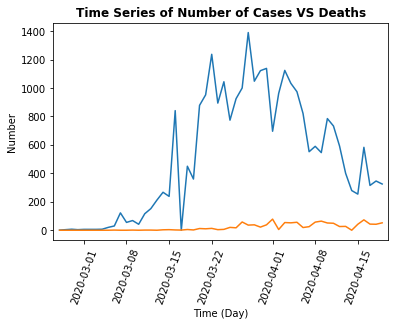

In [40]:
# Plots
pd.plotting.register_matplotlib_converters()

plt.plot(df4['Date'], df4['Cases'],label = 'Cases')
plt.plot(df4['Date'], df4['Deaths'], label = 'Deaths')
plt.title('Time Series of Number of Cases VS Deaths', fontsize='large', fontweight='bold')
plt.xlim(pd.Timestamp('2020-02-25'), pd.Timestamp('2020-04-20'))
plt.xticks(rotation= 70)
plt.xlabel('Time (Day)');
plt.ylabel('Number');
plt.show()



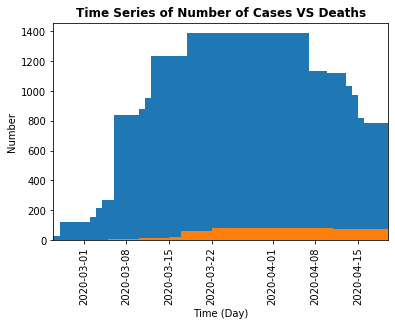

In [41]:
# Or in bar format
plt.bar(df4['Date'], df4['Cases'], width= 20)
plt.bar(df4['Date'], df4['Deaths'], width= 20)
plt.title('Time Series of Number of Cases VS Deaths',fontsize='large', fontweight='bold')
plt.xlim(pd.Timestamp('2020-02-25'), pd.Timestamp('2020-04-20'))
plt.xticks(rotation='vertical')
plt.xlabel('Time (Day)');
plt.ylabel('Number');
plt.rc('figure',figsize = ('40,5'))
plt.show()

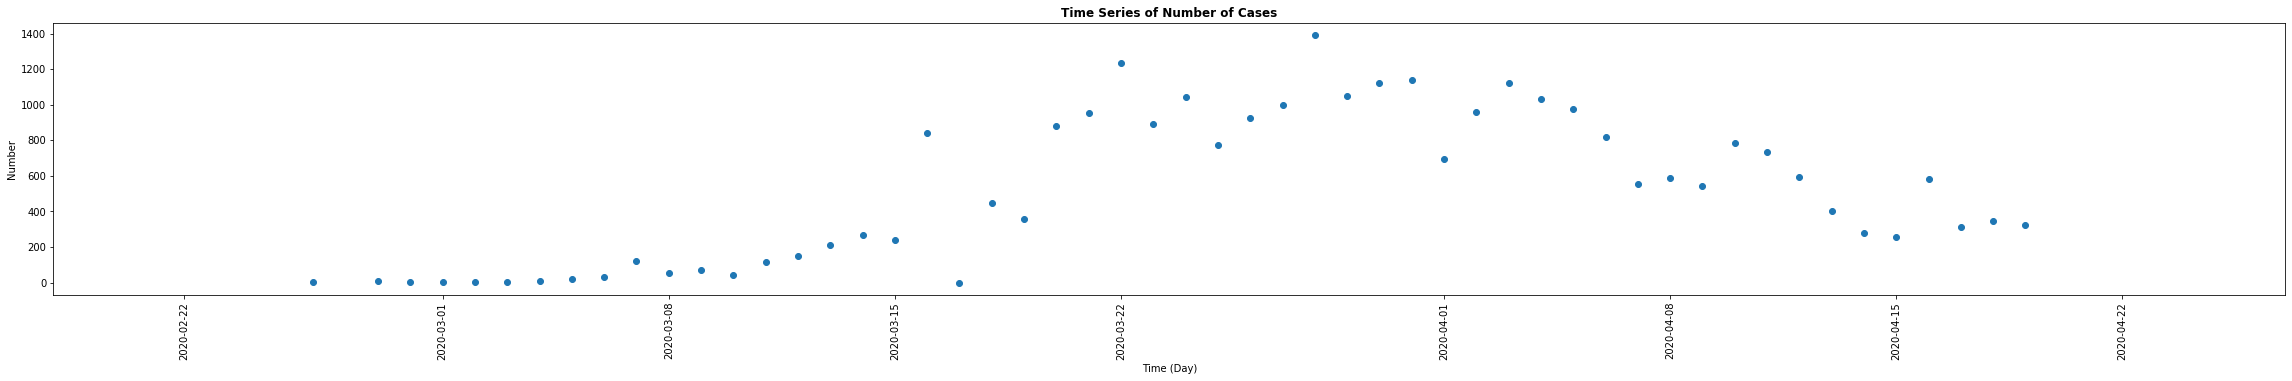

In [42]:
plt.scatter(df4['Date'], df4['Cases'])
plt.title('Time Series of Number of Cases',fontsize='large', fontweight='bold')
plt.xticks(rotation='vertical')
plt.xlabel('Time (Day)');
plt.ylabel('Number');
plt.rc('figure',figsize = ('40,5')) # changes figure's width and height
plt.show()

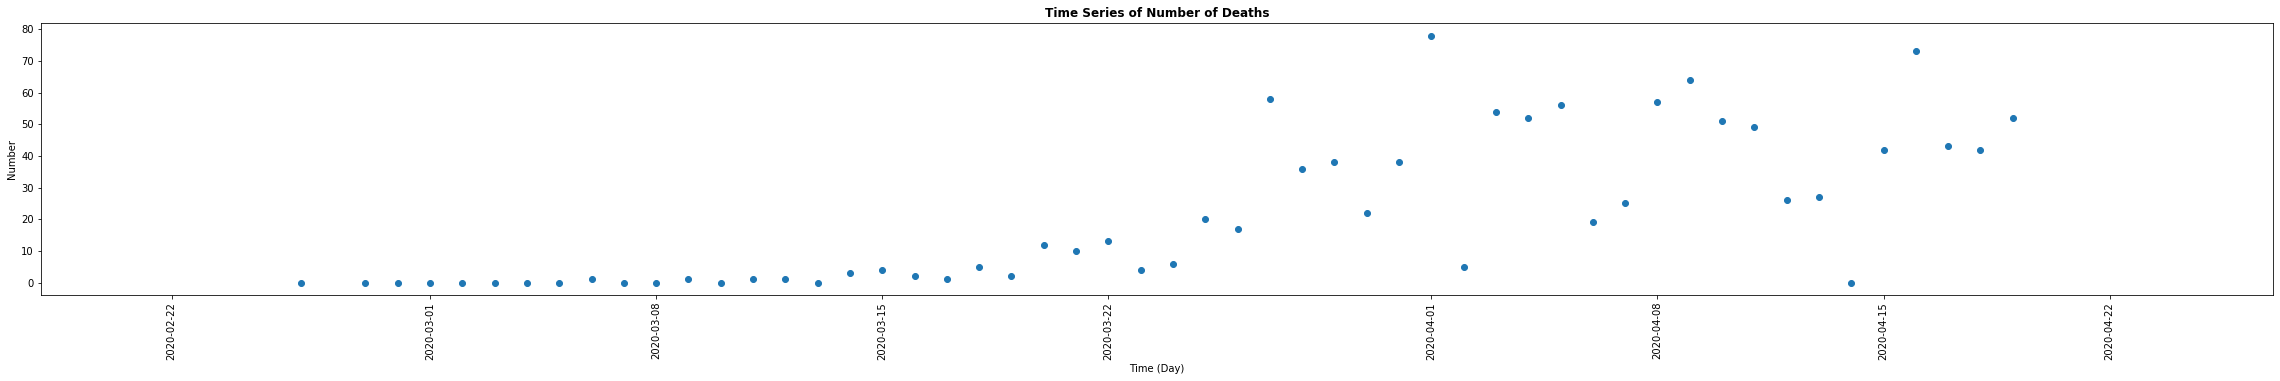

In [43]:
plt.scatter(df4['Date'], df4['Deaths'])
plt.title('Time Series of Number of Deaths',fontsize='large', fontweight='bold')
plt.xticks(rotation='vertical')
plt.xlabel('Time (Day)');
plt.ylabel('Number');
plt.rc('figure',figsize = ('40,5')) # changes figure's width and height
plt.show()

Let's plot some graphs using the seaborn library. We will look into the correlation between cases and deaths and plot a regression line and its residual plot. This is done to understand the relationship between the two variables. This can also be used to predict the number of deaths as a model. However, the model won't forecast very accurately as it will be seen below.

Text(0.5, 1.0, 'Simple Linear Regression')

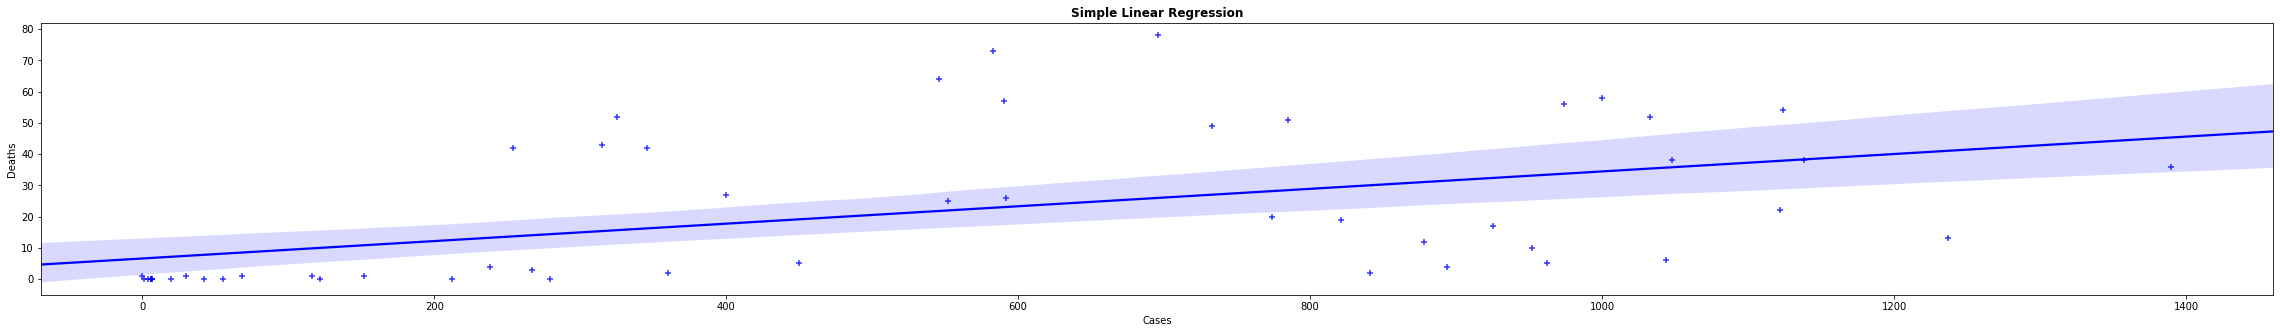

In [44]:
# Simple Linear Regression
chart = sns.regplot(x = 'Cases', y = 'Deaths', data = df4, color = 'blue', marker = '+')
plt.title('Simple Linear Regression',fontsize='large', fontweight='bold')

A good way to visualize the variance of the data is to use a residual plot. The residual is the distance from the data point to the fitted regression line. If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. This is because randomly spread out residuals means that the variance is constant, and hence the linear model is a good fit for this data.

Text(0.5, 1.0, 'Residual Plot')

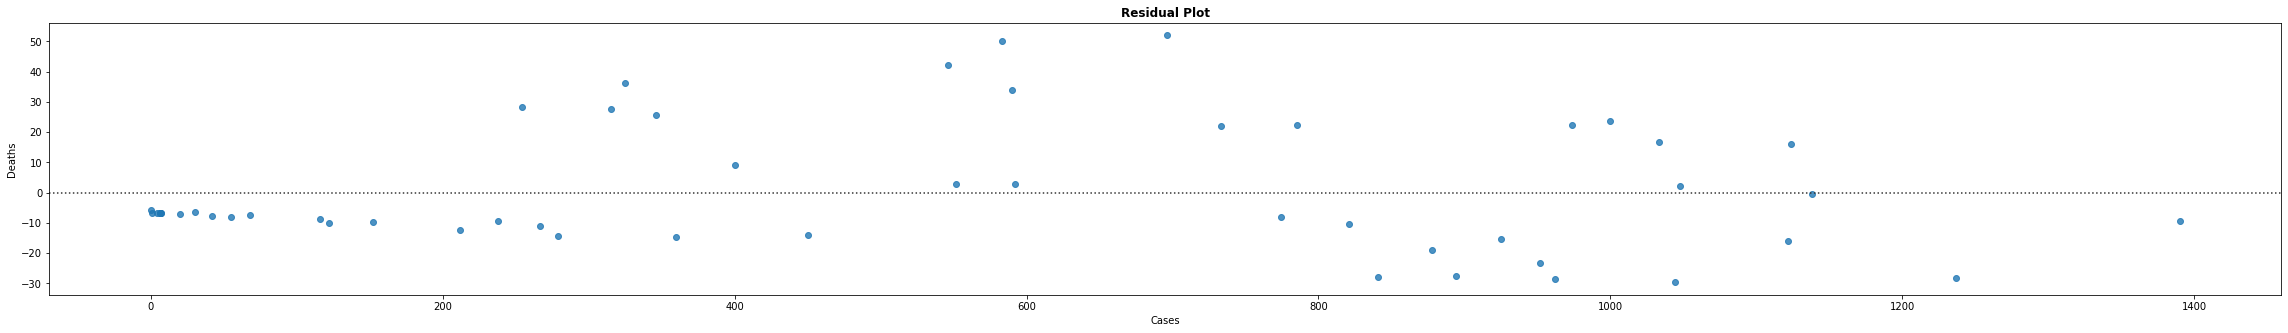

In [45]:
# Residual Plot
chart2 = sns.residplot(df4['Cases'], df4['Deaths'])
plt.title('Residual Plot',fontsize='large', fontweight='bold')

We could argue if a non-linear model would be more suitable or if we simply just need more data.

__Note:__ Many plots could be made using the matplotlib and seaborn libraries but exporting the data onto PowerBI or Tableau definitely is a better choice as interactive dashboards can be made on those softwares, making them more practical from a business standpoint.

First, let's check the __accuracy__ of our model. Two important measures are often used in statistics to compare models and/or to determine the accuracy of a model:

- R^2 (R squared)

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model. The higher the value, the better the fit. 

- MSE (Mean Squared Error)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ). A larger MSE means that the data values are dispersed widely around its mean. The lower the MSE (closest to 0), the higher the accuracy. MSE is better used when comparing models. This does not mean that the one with lowest MSE is necessarily the best model.

__Note:__ There are also other metrics: MAE, RMSE, RAE, RSE, ...

In [46]:
# Find the R^2
lm = LinearRegression()
X = df4[['Cases']]
Y = df4['Deaths']
lm.fit(X,Y)
score = lm.score(X, Y)
print('The R-square is', str(round(score, 4)*100) + '%.')

The R-square is 24.39%.


We can say that approximately 35.3% of the variation of deaths is explained by this simple linear model.

In [47]:
# Predict the output to then compare to actual results
Yhat=lm.predict(X)
print('The output of the first five predicted value is: ', Yhat[0:5])

The output of the first five predicted value is:  [15.63383214 16.21910943 15.35512867 22.82438174 13.65503748]


In [48]:
# Find MSE
mse = mean_squared_error(df4['Deaths'], Yhat)
print('The mean square error of Deaths and predicted value is', str(round(mse, 3)))

The mean square error of Deaths and predicted value is 413.933


__Note:__ It is understandable that __predicting__ or __estimating__ the amount of deaths from such a small data sample (using only the number of cases as the main predicting variable) is not going to be accurate. Most of the time, the more variables we have, the better our model is at predicting. However, having too many variables could also cause noise.

## Conclusion:

We saw the power of Pandas, Numpy, SciPy, Scikit-Learn, Matplotlib, Seaborn and the fun of using those libraries with some styling in Python. In my personal opinion, the visualization section would definitely look better on PowerBI or Tableau. It is also more user/business customer-friendly as you can create simple interactive dashboards (This is what many organizations do) for people who want to explore the data within the case study. This project doesn't really bring out much that isn't on the news. It just shows the fun in coding and finding those analytics.